 ## Task : Python Case Study
 - Your task is to sanitize and analyze the data to profile the sellers present and develop selection criteria to identify the best or most promising sellers in this dataset, that the Acquisitions team at Razor should reach out to, and acquire.

 ## Approach :
 - Analyze the dataset provided on the next slide using Python and present your insights. Please do not do any manual data cleaning (only formula-based sanitization) , and do not use excel for this exercise.

 ## Data : Garden category data from Amazon


### Lifecycle of the given case study :
- Library Import and Data Overview
- Data Cleaning and Sanitation
- Data Profiling
- Visualization and Insights

 ### Library Import and Data Overview

In [ ]:
pip install ydata-profiling

In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
from ydata_profiling import ProfileReport

In [19]:
data_path = '/content/drive/MyDrive/datasets/Sample_Longlist_Data.xlsx'
data = pd.read_excel(data_path)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
data.head(5)

Date Added category sellerlink sellerlink-url     sellerstorefront-url  \
0 2020-11-15   Garden   Seller 1  Seller 1-link  Seller 1-storefrontlink   
1 2020-11-15   Garden   Seller 2  Seller 2-link  Seller 2-storefrontlink   
2 2020-11-15   Garden   Seller 3  Seller 3-link  Seller 3-storefrontlink   
3 2020-11-15   Garden   Seller 4  Seller 4-link  Seller 4-storefrontlink   
4 2020-11-15   Garden   Seller 5  Seller 5-link  Seller 5-storefrontlink   

             sellerproductcount  \
0  1-16 of over 100,000 results   
1                           NaN   
2    1-16 of over 2,000 results   
3           1-16 of 123 results   
4    1-16 of over 1,000 results   

                                      sellerratings  \
0  88% positive in the last 12 months (118 ratings)   
1  90% positive in the last 12 months (566 ratings)   
2   85% positive in the last 12 months (75 ratings)   
3                                               NaN   
4   81% positive in the last 12 months (52 ratings)   

                                       sellerdetails  \
0  Lohas Living Inc James Mazzello US 845 3RD Ave...   
1  Herzlich Willkommen im Amazon Shop von 1a-Hand...   
2  67878u6i7 is committed to providing each custo...   
3  7 days home life supermarket is committed to p...   
4  78 68yui678 is committed to providing each cus...   

                                seller business name  \
0                     Business Name:Lohas Living Inc   
1                    Business Name:1a-Handelsagentur   
2  Business Name:nantongaohuanfangzhipinyouxiango...   
3   Business Name:Zhengzhou Yaoqiong Trading Company   
4  Business Name:shenzhenfeichangshangmeimaoyiyou...   

                                     businessaddress  Count of seller brands  \
0  411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...                      16   
1  1a HandelsagenturLindenallee 2MalchowMecklenbu...                       0   
2  zhongnanshijicheng27zhuang1410haochongchuanqun...                      15   
3         河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN                       1   
4  minzhidadaoshaxialaocun94dongA901longhuaxinqus...                      16   

   Max % of negative seller ratings - last 30 days  \
0                                               17   
1                                                2   
2                                                0   
3                                                0   
4                                                0   

   Max % of negative seller ratings - last 90 days  \
0                                               11   
1                                                2   
2                                               25   
3                                                0   
4                                               31   

   Max % of negative seller ratings - last 12 months  Hero Product 1 #ratings  \
0                                                 12                     5873   
1                                                  9                        0   
2                                                 12                      164   
3                                                  0                        0   
4                                                 15                      224   

   Hero Product 2 #ratings         Sample brand name  \
0                     4957  Visit the YAMAZAKI Store   
1                        0      Visit the tesa Store   
2                      162                    TXYFYP   
3                        0                   SHIFENG   
4                      113                   YUOKI99   

                                    Sample Brand URL  
0  https://www.amazon.de/-/en/stores/YAMAZAKI/pag...  
1  https://www.amazon.de/-/en/stores/tesa/page/12...  
2  https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...  
3  https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...  
4  https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...

In [22]:
data.shape

(1839, 18)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

**Columns to be dropped - 'sellerlink-url','sellerstorefront-url','businessaddress','Sample Brand URL'**

In [24]:
col_drop1 = ['sellerlink-url','sellerstorefront-url','Sample Brand URL']
data.drop(col_drop1,axis=1,inplace=True)

### 2. Data cleaning :
1. Missing values
2. Duplication
3. Missing value replacement
4. Checking statistics of data set
5. Check various categories present in the different categorical column
6. Extracting Important data from columns and creating new columns

In [25]:
data.isna().sum()

Date Added                                             0
category                                               0
sellerlink                                             0
sellerproductcount                                   326
sellerratings                                        428
sellerdetails                                         27
seller business name                                  56
businessaddress                                       75
Count of seller brands                                 0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
Hero Product 1 #ratings                                0
Hero Product 2 #ratings                                0
Sample brand name                                      4
dtype: int64

In [26]:
data.duplicated().sum()

0

In [27]:
# Replacing all the missing values with -1
data.fillna(-1,inplace=True)

In [28]:
data.describe()

Count of seller brands  \
count             1839.000000   
mean                 6.951060   
std                  6.232073   
min                  0.000000   
25%                  1.000000   
50%                  5.000000   
75%                 15.000000   
max                 16.000000   

       Max % of negative seller ratings - last 30 days  \
count                                      1839.000000   
mean                                          5.808592   
std                                          18.117027   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.000000   
75%                                           0.000000   
max                                         100.000000   

       Max % of negative seller ratings - last 90 days  \
count                                      1839.000000   
mean                                          7.632409   
std                                          19.902394   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.000000   
75%                                           4.000000   
max                                         100.000000   

       Max % of negative seller ratings - last 12 months  \
count                                        1839.000000   
mean                                           12.312670   
std                                            23.435871   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                            14.000000   
max                                           100.000000   

       Hero Product 1 #ratings  Hero Product 2 #ratings  
count              1839.000000              1839.000000  
mean               1399.745514               765.173464  
std                6204.123987              3817.355945  
min                   0.000000                 0.000000  
25%                   0.000000                 0.000000  
50%                   3.000000                 1.000000  
75%                 176.500000                87.500000  
max               86856.000000             70732.000000

In [29]:
# Checking the categories of the categorical features:
cat_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
# print(cat_feature)
for i in cat_feature:
  print("The categories in the variable",i,"=",end=" ")
  print(data[i].nunique())

The categories in the variable category = 1
The categories in the variable sellerlink = 1839
The categories in the variable sellerproductcount = 395
The categories in the variable sellerratings = 710
The categories in the variable sellerdetails = 1809
The categories in the variable seller business name = 1784
The categories in the variable businessaddress = 1764
The categories in the variable Sample brand name = 1640


In [30]:
col_drop2 = ['Date Added','category']
data.drop(col_drop2,axis=1,inplace=True)

In [31]:
# There are some columns from which we can extract some important data :
# 1. businessaddress - To identify if a seller is registered in the US , Germany (DE), or China (CN).
# Note : Company do not acquire chinese sellers so, will be removed later.
# 2. sellerproductcount - gives count of products
# 3. seller business name - Name of the business
# 4. sellerdetails - For Email and Phone Number
# 5. sellerratings - For percentage and count of +ve ratings

In [32]:
data['Email'] = " "
data['positive ratings'] = " "
data['phonenumber']=" "
for i in data.index:
  if data['businessaddress'][i]!= -1:
        data['businessaddress'][i]=data['businessaddress'][i][-2:]

  if data['sellerproductcount'][i] != -1:
    data['sellerproductcount'][i]=data['sellerproductcount'][i].split(" ")[-2]
    data['sellerproductcount'][i]=int("".join(data['sellerproductcount'][i].split(",")))

  if data['seller business name'][i]!=-1:
    data['seller business name'][i]=data['seller business name'][i].split(":")[-1]

  if data['sellerdetails'][i]!= -1:
        data['Email'][i]=" ".join(re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", data['sellerdetails'][i]))
        data['phonenumber'][i]=" ".join(re.findall(r'[+][^0-9]?[0-9.\-\(\)]{8,}[0-9]', data['sellerdetails'][i]))

  if data['sellerratings'][i]!=-1 :
    if data['sellerratings'][i]!="":
      data['positive ratings'][i]=int((data['sellerratings'][i].split(" ")[0]).split("%")[0])
      data['sellerratings'][i]=int(re.sub('[^1-9]',"", " ".join(data['sellerratings'][i].split(" ")[-3:])))
    else:
      data['sellerratings'][i]=-1
  else:
    data['positive ratings'][i]=-1

After Cleaning, Parsing - Useful data is as follows

In [33]:
data

sellerlink sellerproductcount sellerratings  \
0        Seller 1             100000           118   
1        Seller 2                 -1           566   
2        Seller 3               2000            75   
3        Seller 4                123            -1   
4        Seller 5               1000            52   
...           ...                ...           ...   
1834  Seller 1835               2000            46   
1835  Seller 1836               5000            -1   
1836  Seller 1837              10000             1   
1837  Seller 1838                473             3   
1838  Seller 1839              20000             2   

                                          sellerdetails  \
0     Lohas Living Inc James Mazzello US 845 3RD Ave...   
1     Herzlich Willkommen im Amazon Shop von 1a-Hand...   
2     67878u6i7 is committed to providing each custo...   
3     7 days home life supermarket is committed to p...   
4     78 68yui678 is committed to providing each cus...   
...                                                 ...   
1834  ZZM Store is committed to providing each custo...   
1835  ZZMIARY is committed to providing each custome...   
1836  zzshd75 is committed to providing each custome...   
1837  ZZY xiaodian is committed to providing each cu...   
1838  zzzswbl is committed to providing each custome...   

                             seller business name businessaddress  \
0                                Lohas Living Inc              US   
1                               1a-Handelsagentur              DE   
2            nantongaohuanfangzhipinyouxiangongsi              CN   
3              Zhengzhou Yaoqiong Trading Company              CN   
4      shenzhenfeichangshangmeimaoyiyouxiangongsi              CN   
...                                           ...             ...   
1834            Shenzhen Xinyile Trading Co., Ltd              CN   
1835              wujixianzhanpingzongheshangdian              CN   
1836              henanliyanshangmaoyouxiangongsi              CN   
1837  shanximinsanyizhuangshijiancaiyouxiangongsi              CN   
1838    nanchangshiyunjianshejizhuangshigongcheng              CN   

      Count of seller brands  Max % of negative seller ratings - last 30 days  \
0                         16                                               17   
1                          0                                                2   
2                         15                                                0   
3                          1                                                0   
4                         16                                                0   
...                      ...                                              ...   
1834                       5                                                0   
1835                       0                                                0   
1836                      10                                                0   
1837                       4                                                0   
1838                       1                                                0   

      Max % of negative seller ratings - last 90 days  \
0                                                  11   
1                                                   2   
2                                                  25   
3                                                   0   
4                                                  31   
...                                               ...   
1834                                                9   
1835                                                0   
1836                                                0   
1837                                                0   
1838                                                0   

      Max % of negative seller ratings - last 12 months  \
0                                                    12   
1                                           

In [34]:
data['phonenumber'].unique()

array(['+1208-964-6807 +1208-964-6807', '',
       '+49-(0)351-259300-11 +49-(0)351-259300-33', '+4932129007172', ' ',
       '+49(0)3386', '+8613043489975',
       '+49-201-89924-0 +49-201-89924-124', '+4915164309452',
       '+3365211184', '+49-9955-23167-44 +49-9955-23167-43',
       '+8613560740532', '+49-(0)35206', '+4962369329325',
       '+493343940993 +493343940995', '+49(0)3643 +49(0)3643',
       '+49-34345-24881 +49-34345-24880', '+8613117900131',
       '+8617085462117'], dtype=object)

In [35]:
data['Email'].nunique()

316

### 3. Data Profiling :

In [36]:
profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4. Visualizations And Insights:


In [38]:
df = data.copy()

**Few more changes before visualization :**

- The company does not acquire chinese sellers - remove the column with 'CN'
- Since, 'Max % of negative seller ratings - last 30 days','Max % of negative seller ratings - last 90 days','Max % of negative seller ratings - last 12 months' are highly overall correlated so for analysis purpose, we can use there mean

In [39]:
value_to_drop = 'CN'
column_to_check = 'businessaddress'
# Boolean Mask :
mask = df[column_to_check] != value_to_drop

df = df[mask]

In [40]:
df['businessaddress'].unique()

array(['US', 'DE', -1, 'IE', 'AT', 'ES', 'PL', 'GB', 'IT', 'FR', 'SE',
       'HK', 'NL', 'TH', 'AU', 'BE', 'JP', 'CZ', 'IN', 'PT', 'CH'],
      dtype=object)

In [41]:
df['mean_negative'] = df[['Max % of negative seller ratings - last 30 days',
                          'Max % of negative seller ratings - last 90 days',
                          'Max % of negative seller ratings - last 12 months']].mean(axis=1)

In [42]:
# To obtain seller number :
df['sellernumber'] = " "
for i in df.index:
    df['sellernumber'][i]=df['sellerlink'][i].split(" ")[-1]

In [43]:
df = df.drop(['Max % of negative seller ratings - last 30 days',
              'Max % of negative seller ratings - last 90 days',
              'Max % of negative seller ratings - last 12 months',
              'businessaddress','Email','sellerlink'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 1828
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sellerproductcount       602 non-null    object 
 1   sellerratings            602 non-null    object 
 2   sellerdetails            602 non-null    object 
 3   seller business name     602 non-null    object 
 4   Count of seller brands   602 non-null    int64  
 5   Hero Product 1 #ratings  602 non-null    int64  
 6   Hero Product 2 #ratings  602 non-null    int64  
 7   Sample brand name        602 non-null    object 
 8   positive ratings         602 non-null    object 
 9   phonenumber              602 non-null    object 
 10  mean_negative            602 non-null    float64
 11  sellernumber             602 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 77.3+ KB


In [44]:
# Visulaization and Insights

In [45]:
df.head(5)

sellerproductcount sellerratings  \
0              100000           118   
1                  -1           566   
5                  28            -1   
14                919           116   
19                 -1          3721   

                                        sellerdetails  \
0   Lohas Living Inc James Mazzello US 845 3RD Ave...   
1   Herzlich Willkommen im Amazon Shop von 1a-Hand...   
5   7830jeff is committed to providing each custom...   
14  Impressum\n \n Gesetzliche Anbieterkennung:\n ...   
19  Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...   

         seller business name  Count of seller brands  \
0            Lohas Living Inc                      16   
1           1a-Handelsagentur                       0   
5                          -1                      13   
14               Oliver Mills                      15   
19  ABC-Schnäppchenmarkt GmbH                       0   

    Hero Product 1 #ratings  Hero Product 2 #ratings  \
0                      5873                     4957   
1                         0                        0   
5                      3284                     2944   
14                     1446                      921   
19                        0                        0   

               Sample brand name positive ratings  \
0       Visit the YAMAZAKI Store               88   
1           Visit the tesa Store               90   
5                         Strata               -1   
14                     Unbekannt               97   
19  Visit the TFA Dostmann Store               76   

                      phonenumber  mean_negative sellernumber  
0   +1208-964-6807 +1208-964-6807      13.333333            1  
1                                       4.333333            2  
5                                       0.000000            6  
14                                      1.000000           15  
19                                     19.333333           20

In [46]:
df.head()


sellerproductcount sellerratings  \
0              100000           118   
1                  -1           566   
5                  28            -1   
14                919           116   
19                 -1          3721   

                                        sellerdetails  \
0   Lohas Living Inc James Mazzello US 845 3RD Ave...   
1   Herzlich Willkommen im Amazon Shop von 1a-Hand...   
5   7830jeff is committed to providing each custom...   
14  Impressum\n \n Gesetzliche Anbieterkennung:\n ...   
19  Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...   

         seller business name  Count of seller brands  \
0            Lohas Living Inc                      16   
1           1a-Handelsagentur                       0   
5                          -1                      13   
14               Oliver Mills                      15   
19  ABC-Schnäppchenmarkt GmbH                       0   

    Hero Product 1 #ratings  Hero Product 2 #ratings  \
0                      5873                     4957   
1                         0                        0   
5                      3284                     2944   
14                     1446                      921   
19                        0                        0   

               Sample brand name positive ratings  \
0       Visit the YAMAZAKI Store               88   
1           Visit the tesa Store               90   
5                         Strata               -1   
14                     Unbekannt               97   
19  Visit the TFA Dostmann Store               76   

                      phonenumber  mean_negative sellernumber  
0   +1208-964-6807 +1208-964-6807      13.333333            1  
1                                       4.333333            2  
5                                       0.000000            6  
14                                      1.000000           15  
19                                     19.333333           20

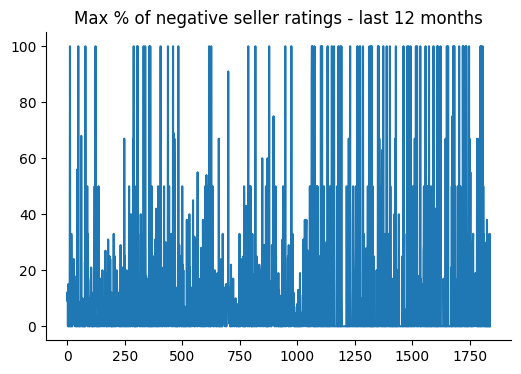

In [157]:
data['Max % of negative seller ratings - last 12 months'].plot(kind='line', figsize=(6, 4), title='Max % of negative seller ratings - last 12 months')
plt.gca().spines[['top', 'right']].set_visible(False)

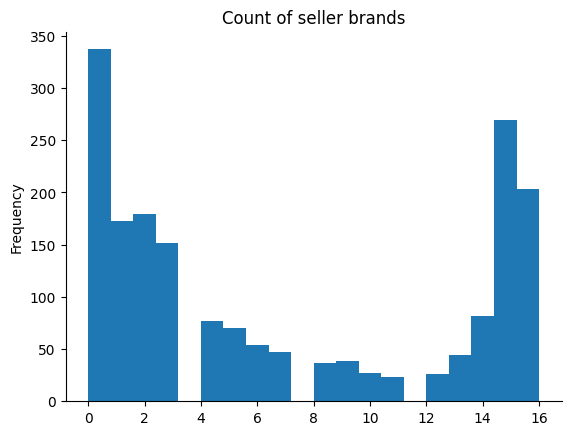

In [158]:
data['Count of seller brands'].plot(kind='hist', bins=20, title='Count of seller brands')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Comparing Seller Product Count

In [120]:
def bar(i, df):
    fig = px.bar(df, x='sellernumber', y=i, color=i)  # Specify color=i to color the bars based on the 'i' column
    fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)  # Adjust color and opacity
    fig.show()

bar('sellerproductcount', df)

In [97]:
df['sellerproductcount'] = df['sellerproductcount'].astype('int64')
df['sellerratings'] = df['sellerratings'].astype('int64')
df['positive ratings'] = df['positive ratings'].astype('int64')
df['sellernumber'] = df['sellernumber'].astype('int64')

These are the Top 10 seller who have highest seller product count.




In [145]:
top_10_rows = df.nlargest(10, 'sellerproductcount')
top_10_selected_columns = top_10_rows[['sellernumber', 'seller business name', 'sellerproductcount']]

In [146]:
print(top_10_selected_columns.to_string(index=False))

 sellernumber                       seller business name  sellerproductcount
          713                TRADEINN RETAIL SERVICES SL              200000
            1                           Lohas Living Inc              100000
           24          Blumenbecker Industriebedarf GmbH              100000
           34                               Tkog Iwy INC              100000
          186                              DUO KREIS LLC              100000
          445                                         -1              100000
          496                       C. Y. MARKETING INC.              100000
          986 Schreibwaren Wegmann, Inh. Janos Metz e.K.              100000
         1785                  Zoreno Versandhandel GmbH              100000
           32                                  Dinan LLC               80000


### Comparing Seller Ratings


In [121]:
bar('sellerratings',df)

### These are the seller with highest seller ratings

In [148]:
top_10_seller_ratings = df.nlargest(10, 'sellerratings')
top_10_selected_columns_2 = top_10_seller_ratings[['sellernumber', 'seller business name', 'sellerratings']]
print(top_10_selected_columns_2.to_string(index=False))

 sellernumber      seller business name  sellerratings
          487               PEARL. GmbH          37124
         1008    Asia Pacific Elite Ltd           7465
          727            trendmile GmbH           7242
          753      TTT-Filmservice GmbH           5826
          558              TecTake GmbH           4919
           54         Kaleido.Shop GmbH           4189
           20 ABC-Schnäppchenmarkt GmbH           3721
          572       Diva Teppich Center           3634
          744               Trotec GmbH           3557
          101   Kessler electronic GmbH           3416


### Comparing Hero Product Rating 1 #ratings

In [132]:
bar('Hero Product 1 #ratings',df)

In [127]:
top_10_hero_ratings1 = df.nlargest(10, 'Hero Product 1 #ratings')

In [149]:
top_10_selected_columns_3 = top_10_hero_ratings1[['sellernumber', 'seller business name', 'Hero Product 1 #ratings']]
print(top_10_selected_columns_3.to_string(index=False))

 sellernumber          seller business name  Hero Product 1 #ratings
          948           VIP Plaza Japan Inc                    86856
          496          C. Y. MARKETING INC.                    77714
          323             Milovan Stojkovic                    71673
          843              Vertecchi S.r.l.                    71670
          207               Kubustotaal vof                    66776
          883 Vitamed Matthias Quinger e.K.                    66776
          322             VARIA System GmbH                    60384
          820              Venner Sales Ltd                    51755
         1059                    SJ-Werbung                    47340
          101       Kessler electronic GmbH                    47337


#### Comparing Hero Product 2 #Ratings

In [134]:
bar('Hero Product 2 #ratings',df)

These are the Sellers with Highest Hero Product 2 #ratings

In [150]:
top_10_hero2 = df.nlargest(10, 'Hero Product 2 #ratings')
top_10_selected_columns_4 = top_10_hero2[['sellernumber', 'seller business name', 'Hero Product 2 #ratings']]
print(top_10_selected_columns_4.to_string(index=False))

 sellernumber          seller business name  Hero Product 2 #ratings
          496          C. Y. MARKETING INC.                    70732
          323             Milovan Stojkovic                    58332
          322             VARIA System GmbH                    57769
          843              Vertecchi S.r.l.                    51755
          948           VIP Plaza Japan Inc                    37716
          820              Venner Sales Ltd                    35167
          101       Kessler electronic GmbH                    32420
          883 Vitamed Matthias Quinger e.K.                    32420
          838            Swen Bierschneider                    30140
          207               Kubustotaal vof                    20759


### Comparing with positive ratings

In [82]:
bar('positive ratings',df)

These are the sellers with highest positive ratings

In [151]:
top_10__positive_ratings = df.nlargest(10, 'positive ratings')
top_10_selected_columns_5 = top_10__positive_ratings[['sellernumber', 'seller business name', 'positive ratings']]
print(top_10_selected_columns_5.to_string(index=False))

 sellernumber             seller business name  positive ratings
           23              MADEWELL SUPPLY INC               100
           58                      DE332440907               100
           65 Kanister-Vertrieb MW Markus Waas               100
           68                      Karabu srls               100
           72                      katerrot 27               100
           73                               -1               100
           79                   sarl jack bout               100
          109                  KG Technik GmbH               100
          111               V'ronis Kinderland               100
          115           Stahlfachhandel-Kiefer               100


### Comparing Negative Ratings

In [153]:
bar('mean_negative',df)

These are sellers with highest negative ratings

In [141]:
top_10_neagtive_ratings = df.nlargest(10, 'mean_negative')

In [152]:
top_10_selected_columns_6 = top_10_neagtive_ratings[['sellernumber', 'seller business name', 'mean_negative']]
print(top_10_selected_columns_6.to_string(index=False))

 sellernumber                seller business name  mean_negative
         1404                      Xtra Europe BV     100.000000
          701           YARRAGOLLA CHANDRA SEKHAR      97.000000
          501                     T&T company Srl      83.333333
          278                  Les animaux du net      71.666667
          307                                  -1      66.666667
          461                                  -1      66.666667
          779      V-STAR TRADING COMPANY LIMITED      61.000000
          606                      DGH DREAMS LTD      53.333333
          890               Peter Alois Storkmann      53.333333
          782 GbR mit Stefan Fels , Marcel Rieger      45.333333


#### **So, according to the overall analysis these are the best sellers Razor-Group should reach are:**
##### 1. Blumenbecker Industriebedarf GmbH
##### 2. itenga GmbH
##### 3. Kaleido.Shop GmbH
##### 4. Kessler electronic GmbH
##### 5. click-licht.de GmbH & Co. KG
##### 6. Milovan Stojkovic
##### 7. Geschenke Direkt GmbH
##### 8. The Quilted Bear Ltd